In [12]:
import scda
import os
import sys
import shutil
import numpy as np

import matplotlib.pyplot as plt
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['axes.linewidth'] = 1.
matplotlib.rcParams['lines.linewidth'] = 2.5
matplotlib.rcParams['font.size'] = 11

import logging
scda.configure_log()
# The following two lines are a temporary fix for ipykernel's broken stderr output; 
# See https://github.com/ipython/ipykernel/issues/111
logger = logging.getLogger() 
logger.handlers[0].stream = sys.stdout

print("Imported scda module from {0:s}".format(os.path.abspath(scda.__file__)))

Populating the interactive namespace from numpy and matplotlib
Imported scda module from /Users/ntz/SCDA/scda_pytools/scda.pyc


## Set the design parameters

In [13]:
pupil_params_bw = {'N': 250, 'prim':'hex1', 'centobs':True, 'secobs':'X', 'thick':'025', 'edge':'floor'}
pupil_params_gray = {'N': 250, 'prim':'hex1', 'centobs':True, 'secobs':'X', 'thick':'025', 'edge':'gray'}
fpm_params = {'rad': 4., 'M': 60}
ls_params_aligntol = {'obscure':2, 'id':20, 'od':110, 'pad':5, 'aligntol':2, 'aligntolcon':3.}
ls_params = {'obscure':2, 'id':20, 'od':110, 'pad':5, 'aligntol':None}
image_params = {'c': 10., 'ida':-0.5, 'oda':10., 'bw':0.10, 'Nlam':3}
image_params_mono = {'c': 10., 'ida':-0.5, 'oda':10., 'bw':0., 'Nlam':1}

In [19]:
#work_dir = "/astro/opticslab1/SCDA/Scripts/AMPL/LStol_may/"
#work_dir = "/Users/neil/Box Sync/scda/LStol_may/"
work_dir = os.path.expanduser("~/Box Sync/scda/LStol_may/")
if not os.path.exists(os.path.normpath(work_dir)):
    os.mkdir(work_dir)
#input_dir = "/astro/opticslab1/SCDA/Apertures/InputMasks" # location of input TelAp, FPM, and LS arrays
#input_dir = "/astro/opticslab1/SCDA/Apertures/InputMasks_v3" # location of input TelAp, FPM, and LS arrays
#input_dir = "/Users/neil/Box Sync/scda/InputMasks" # location of input TelAp, FPM, and LS arrays
input_dir = os.path.expanduser("~/Box Sync/scda/InputMasks") # location of input TelAp, FPM, and LS arrays
TelAp_dir = os.path.join(input_dir, "TelAp")
FPM_dir = os.path.join(input_dir, "FPM")
LS_dir = os.path.join(input_dir, "LS")

In [20]:
design_params_graytelap = {'Pupil': pupil_params_gray, 'FPM': fpm_params,
                           'LS': ls_params, 'Image': image_params}
design_params_aligntol_graytelap = {'Pupil': pupil_params_gray, 'FPM': fpm_params,
                                    'LS': ls_params_aligntol, 'Image': image_params}
design_params_mono_graytelap = {'Pupil': pupil_params_gray, 'FPM': fpm_params,
                                'LS': ls_params, 'Image': image_params_mono}
design_params_aligntol_mono_graytelap = {'Pupil': pupil_params_gray, 'FPM': fpm_params,
                                         'LS': ls_params_aligntol, 'Image': image_params_mono}

design_params_bwtelap = {'Pupil': pupil_params_bw, 'FPM': fpm_params,
                         'LS': ls_params, 'Image': image_params}
design_params_aligntol_bwtelap = {'Pupil': pupil_params_bw, 'FPM': fpm_params,
                                  'LS': ls_params_aligntol, 'Image': image_params}
design_params_mono_bwtelap = {'Pupil': pupil_params_bw, 'FPM': fpm_params,
                              'LS': ls_params, 'Image': image_params_mono}
design_params_aligntol_mono_bwtelap = {'Pupil': pupil_params_bw, 'FPM': fpm_params,
                                       'LS': ls_params_aligntol, 'Image': image_params_mono}

fileorg = {'work dir': work_dir, 'TelAp dir': TelAp_dir,
           'FPM dir': FPM_dir, 'LS dir': LS_dir}
bar = {'method': 'bar'}
barhom = {'method': 'barhom'}
barhomconvtol = {'method': 'barhom', 'convtol':9.}

## Initiate the coronagraph objects

In [21]:
hexap_qpaplc_mono_graytelap = scda.QuarterplaneAPLC(design=design_params_mono_graytelap, fileorg=fileorg, solver=barhom)
hexap_qpaplc_aligntol_mono_graytelap = scda.QuarterplaneAPLC(design=design_params_aligntol_mono_graytelap, fileorg=fileorg, solver=barhom)
hexap_qpaplc_graytelap = scda.QuarterplaneAPLC(design=design_params_graytelap, fileorg=fileorg, solver=barhom)
hexap_qpaplc_aligntol_graytelap = scda.QuarterplaneAPLC(design=design_params_aligntol_graytelap, fileorg=fileorg, solver=barhom)

hexap_qpaplc_mono_bwtelap = scda.QuarterplaneAPLC(design=design_params_mono_bwtelap, fileorg=fileorg, solver=barhom)
hexap_qpaplc_aligntol_mono_bwtelap = scda.QuarterplaneAPLC(design=design_params_aligntol_mono_bwtelap, fileorg=fileorg, solver=barhom)
hexap_qpaplc_bwtelap = scda.QuarterplaneAPLC(design=design_params_bwtelap, fileorg=fileorg, solver=barhom)
hexap_qpaplc_aligntol_bwtelap = scda.QuarterplaneAPLC(design=design_params_aligntol_bwtelap, fileorg=fileorg, solver=barhom)

In [22]:
#hexap_qpaplc_mono_graytelap.fileorg

In [23]:
#hexap_qpaplc_mono_bwtelap.fileorg

### Check the status of input files needed to run the AMPL program

In [24]:
hexap_qpaplc_aligntol_mono_bwtelap.check_ampl_input_files()
print("All the input files for AMPL are in place for the align-tol quarter-plane APLC? {0:}".format(
      hexap_qpaplc_aligntol_mono_bwtelap.ampl_infile_status))

hexap_qpaplc_aligntol_mono_bwtelap.check_ampl_input_files()
print("All the input files for AMPL are in place for the quarter-plane APLC? {0:}".format(
      hexap_qpaplc_mono_bwtelap.ampl_infile_status))

All the input files for AMPL are in place for the align-tol quarter-plane APLC? True
All the input files for AMPL are in place for the quarter-plane APLC? True


## Write the AMPL source file

In [25]:
hexap_qpaplc_mono_bwtelap.write_ampl(override_infile_status=False, overwrite=True)
hexap_qpaplc_aligntol_mono_bwtelap.write_ampl(override_infile_status=False, overwrite=True)
hexap_qpaplc_bwtelap.write_ampl(override_infile_status=False, overwrite=True)
hexap_qpaplc_aligntol_bwtelap.write_ampl(override_infile_status=False, overwrite=True)

INFO:root:Wrote /Users/ntz/Box Sync/scda/LStol_may/APLC_quart_hex1X025cobs1_N0250f_FPM400M060_LSann20D110hex1X025cobs1Pad05_Img100C_35DA100_BW00Nlam01fpres2_linbarhompre1.mod
INFO:root:Wrote /Users/ntz/Box Sync/scda/LStol_may/APLC_quart_hex1X025cobs1_N0250f_FPM400M060_LSann20D110hex1X025cobs1Pad05Tol02s30_Img100C_35DA100_BW00Nlam01fpres2_linbarhompre1.mod
INFO:root:Wrote /Users/ntz/Box Sync/scda/LStol_may/APLC_quart_hex1X025cobs1_N0250f_FPM400M060_LSann20D110hex1X025cobs1Pad05_Img100C_35DA100_BW10Nlam03fpres2_linbarhompre1.mod
INFO:root:Wrote /Users/ntz/Box Sync/scda/LStol_may/APLC_quart_hex1X025cobs1_N0250f_FPM400M060_LSann20D110hex1X025cobs1Pad05Tol02s30_Img100C_35DA100_BW10Nlam03fpres2_linbarhompre1.mod


0

In [26]:
bash_fname = os.path.join(hexap_qpaplc_aligntol_mono_bwtelap.fileorg['ampl src dir'], 'run_LDZ_test_bwtelap_v3.sh')
bash_fobj = open(bash_fname, "w")
bash_fobj.write("#! /bin/bash -x\n")
bash_fobj.write("ampl {0:s}\n".format(hexap_qpaplc_mono_bwtelap.fileorg['ampl src fname']))
bash_fobj.write("ampl {0:s}\n".format(hexap_qpaplc_aligntol_mono_bwtelap.fileorg['ampl src fname']))
bash_fobj.write("ampl {0:s}\n".format(hexap_qpaplc_bwtelap.fileorg['ampl src fname']))
bash_fobj.write("ampl {0:s}\n".format(hexap_qpaplc_aligntol_bwtelap.fileorg['ampl src fname']))
bash_fobj.close()
os.chmod(bash_fname, 0775)
print("Wrote serial bash execution script to {0:s}".format(bash_fname))

Wrote serial bash execution script to /Users/ntz/Box Sync/scda/LStol_may/run_LDZ_test_bwtelap_v3.sh


## Evaluate basic coronagraph metrics

In [27]:
hexap_qpaplc_mono_bwtelap.get_metrics()

Non-binary residuals, as a percentage of clear telescope aperture area: 0.07%
Band-averaged Airy throughput: 18.15%
Band-averaged relative Airy throughput: 42.37%
Band-averaged FWHM PSF area / (lambda0/D)^2: 1.03


In [28]:
hexap_qpaplc_aligntol_mono_bwtelap.get_metrics()

Non-binary residuals, as a percentage of clear telescope aperture area: 1.32%
Band-averaged Airy throughput: 17.00%
Band-averaged relative Airy throughput: 39.69%
Band-averaged FWHM PSF area / (lambda0/D)^2: 1.05


In [30]:
hexap_qpaplc_bwtelap.get_metrics()

Non-binary residuals, as a percentage of clear telescope aperture area: 0.71%
Band-averaged Airy throughput: 7.24%
Band-averaged relative Airy throughput: 17.06%
Band-averaged FWHM PSF area / (lambda0/D)^2: 1.32


In [31]:
#hexap_coron_noaligntol = hexap_qpaplc_mono_bwtelap
hexap_coron_noaligntol = hexap_qpaplc_bwtelap
hexap_coron_aligntol = hexap_qpaplc_aligntol_mono_bwtelap

In [32]:
TelAp_qp = np.floor(np.loadtxt(hexap_coron_noaligntol.fileorg['TelAp fname'])).astype(int)
TelAp = np.concatenate((np.concatenate((TelAp_qp[::-1,::-1], TelAp_qp[:,::-1]),axis=0),
                        np.concatenate((TelAp_qp[::-1,:], TelAp_qp),axis=0)), axis=1)
FPM_qp = np.loadtxt(hexap_coron_noaligntol.fileorg['FPM fname'])
FPM = np.concatenate((np.concatenate((FPM_qp[::-1,::-1], FPM_qp[:,::-1]),axis=0),
                      np.concatenate((FPM_qp[::-1,:], FPM_qp),axis=0)), axis=1)

LS_qp = np.loadtxt(hexap_coron_noaligntol.fileorg['LS fname'])
LS = np.concatenate((np.concatenate((LS_qp[::-1,::-1], LS_qp[:,::-1]),axis=0),
                     np.concatenate((LS_qp[::-1,:], LS_qp),axis=0)), axis=1)

LDZ_qp = np.loadtxt(hexap_coron_aligntol.fileorg['LDZ fname'])
LDZ = np.concatenate((np.concatenate((LDZ_qp[::-1,::-1], LDZ_qp[:,::-1]),axis=0),
                      np.concatenate((LDZ_qp[::-1,:], LDZ_qp),axis=0)), axis=1)

An_col = np.loadtxt(hexap_coron_noaligntol.fileorg['sol fname'])[:,-1]
An_qp = An_col.reshape(TelAp_qp.shape)
An = np.concatenate((np.concatenate((An_qp[::-1,::-1], An_qp[:,::-1]),axis=0),
                     np.concatenate((An_qp[::-1,:], An_qp),axis=0)), axis=1)

At_col = np.loadtxt(hexap_coron_aligntol.fileorg['sol fname'])[:,-1]
At_qp = At_col.reshape(TelAp_qp.shape)
At = np.concatenate((np.concatenate((At_qp[::-1,::-1], At_qp[:,::-1]),axis=0),
                     np.concatenate((At_qp[::-1,:], At_qp),axis=0)), axis=1)

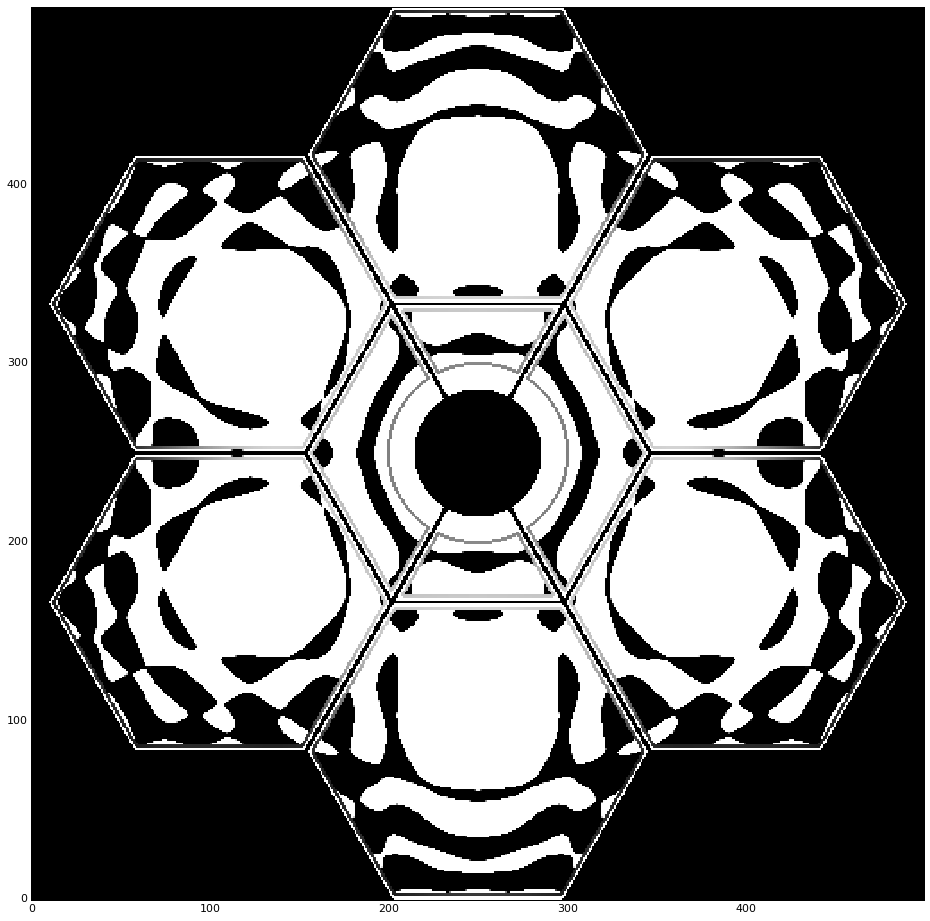

In [39]:
plt.figure(figsize=(16,16))
plt.imshow(At*TelAp)

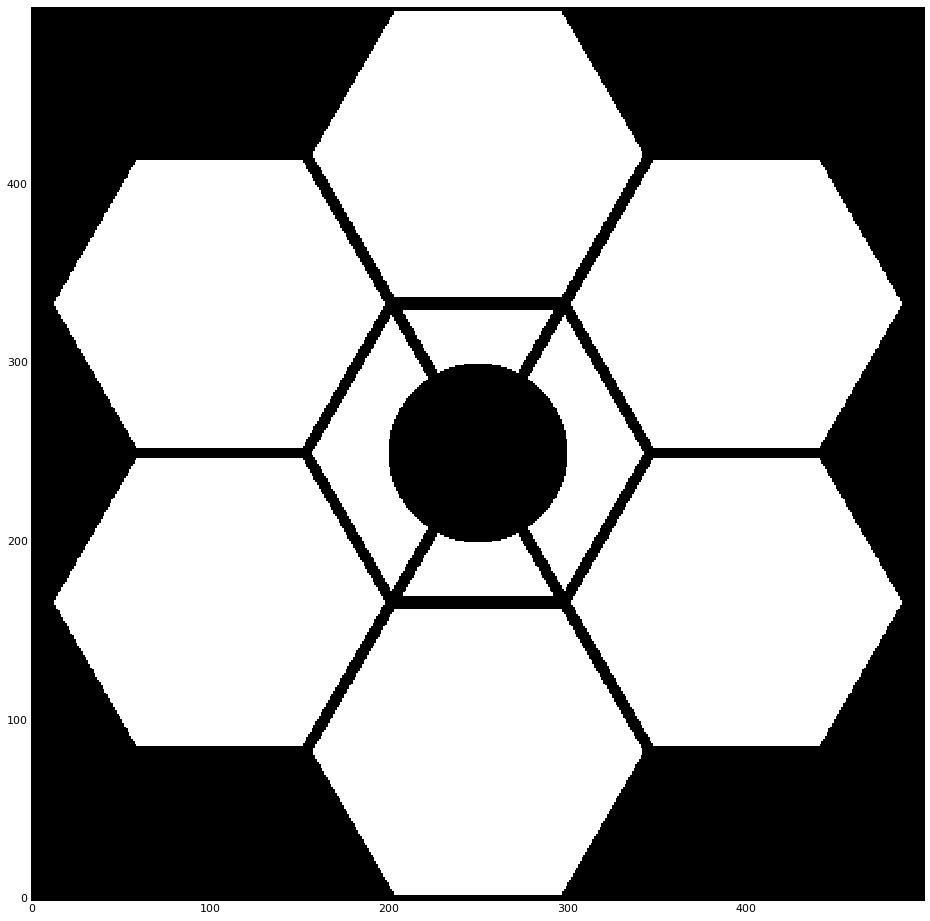

In [34]:
plt.figure(figsize=(16,16))
plt.imshow(LS)

In [35]:
def get_onax_aplc_psf(TelAp, A, FPM, LS, xs, dx, mxs, dmx, xis, dxi, wrs):
    intens_D_polychrom = []
    for wr in wrs:
        Psi_B = dx*dx/wr*np.dot(np.dot(np.exp(-1j*2*np.pi/wr*np.dot(mxs.T, xs)), TelAp*A ),
                                       np.exp(-1j*2*np.pi/wr*np.dot(xs.T, mxs)))
        Psi_B_stop = np.multiply(Psi_B, FPM)
        Psi_C = A*TelAp - dmx*dmx/wr*np.dot(np.dot(np.exp(-1j*2*np.pi/wr*np.dot(xs.T, mxs)), Psi_B_stop),
                                                   np.exp(-1j*2*np.pi/wr*np.dot(mxs.T, xs)))
        Psi_C_stop = np.multiply(Psi_C, LS)
        Psi_D = dx*dx/wr*np.dot(np.dot(np.exp(-1j*2*np.pi/wr*np.dot(xis.T, xs)), Psi_C_stop),
                                       np.exp(-1j*2*np.pi/wr*np.dot(xs.T, xis)))
        Psi_D_0_peak = np.sum(A*TelAp*LS)*dx*dx/wr
        intens_D_polychrom.append(np.power(np.absolute(Psi_D)/Psi_D_0_peak, 2))
    return intens_D_polychrom

In [36]:
D = 1.
N = hexap_coron_noaligntol.design['Pupil']['N']
bw = hexap_coron_noaligntol.design['Image']['bw']
Nlambda = hexap_coron_noaligntol.design['Image']['Nlam']
M_fp1 = hexap_coron_noaligntol.design['FPM']['M']
fpm_rad = hexap_coron_noaligntol.design['FPM']['rad']
rho2 = hexap_coron_noaligntol.design['Image']['oda'] + 2.
fp2res = 8.
M_fp2 = int(np.ceil(rho2*fp2res))

# pupil plane
dx = (D/2)/N
dy = dx
xs = np.matrix(np.linspace(-N+0.5,N-0.5,2*N)*dx)
ys = xs

# FPM
dmx = fpm_rad/M_fp1
dmy = dmx
mxs = np.matrix(np.linspace(-M_fp1+0.5,M_fp1-0.5,2*M_fp1)*dmx)
mys = mxs

# FP2
dxi = 1/fp2res
xis = np.matrix(np.linspace(-M_fp2+0.5,M_fp2-0.5,2*M_fp2)*dxi)
etas = xis

# wavelength ratios
wrs = np.linspace(1.-bw/2, 1.+bw/2, Nlambda)
print("PSF model wavelength ratios: {0:}".format(wrs))

PSF model wavelength ratios: [ 0.95  1.    1.05]


In [37]:
intens_n_polychrom = get_onax_aplc_psf(TelAp, An, FPM, LS, xs, dx, mxs, dmx, xis, dxi, wrs)
intens_t_polychrom = get_onax_aplc_psf(TelAp, At, FPM, LS, xs, dx, mxs, dmx, xis, dxi, wrs)

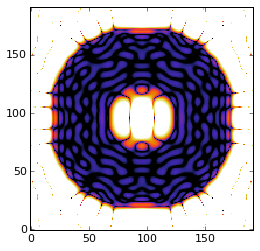

In [40]:
plt.imshow(np.log10(intens_t_polychrom[1]), vmin=-11, vmax=-7, cmap='CMRmap')

In [ ]:
hexap_qpaplc_aligntol_mono.get_metrics()

In [ ]:
hexap_coron_noaligntol = hexap_qpaplc_mono_bwtelap
hexap_coron_aligntol = hexap_qpaplc_aligntol_mono_bwtelap

In [ ]:
hexap_coron_noaligntol.fileorg['ampl src fname']

In [ ]:
hexap_coron_aligntol.fileorg['ampl src fname']

# Full-plane on-axis PSF evaluation

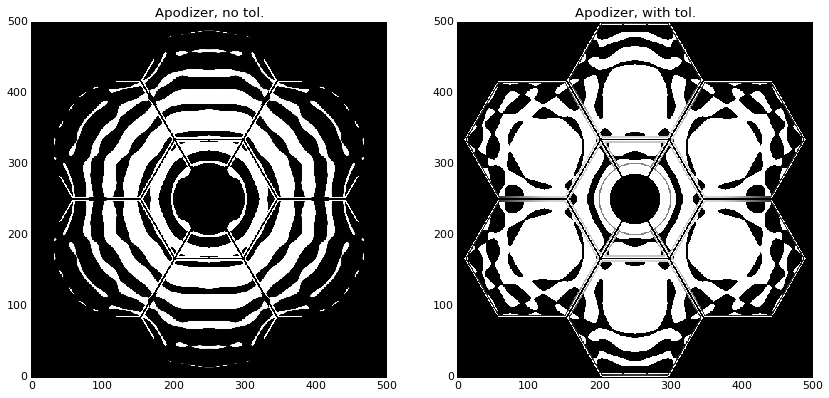

In [41]:
TelAp_qp = np.floor(np.loadtxt(hexap_coron_noaligntol.fileorg['TelAp fname']))
TelAp = np.concatenate((np.concatenate((TelAp_qp[::-1,::-1], TelAp_qp[:,::-1]),axis=0),
                        np.concatenate((TelAp_qp[::-1,:], TelAp_qp),axis=0)), axis=1)

FPM_qp = np.loadtxt(hexap_coron_noaligntol.fileorg['FPM fname'])
FPM = np.concatenate((np.concatenate((FPM_qp[::-1,::-1], FPM_qp[:,::-1]),axis=0),
                      np.concatenate((FPM_qp[::-1,:], FPM_qp),axis=0)), axis=1)

LS_qp = np.loadtxt(hexap_coron_noaligntol.fileorg['LS fname'])
LS = np.concatenate((np.concatenate((LS_qp[::-1,::-1], LS_qp[:,::-1]),axis=0),
                     np.concatenate((LS_qp[::-1,:], LS_qp),axis=0)), axis=1)

LDZ_qp = np.loadtxt(hexap_coron_aligntol.fileorg['LDZ fname'])
LDZ = np.concatenate((np.concatenate((LDZ_qp[::-1,::-1], LDZ_qp[:,::-1]),axis=0),
                      np.concatenate((LDZ_qp[::-1,:], LDZ_qp),axis=0)), axis=1)

An_col = np.loadtxt(hexap_coron_noaligntol.fileorg['sol fname'])[:,-1]
An_qp = An_col.reshape(TelAp_qp.shape)
An = np.concatenate((np.concatenate((An_qp[::-1,::-1], An_qp[:,::-1]),axis=0),
                     np.concatenate((An_qp[::-1,:], An_qp),axis=0)), axis=1)
At_col = np.loadtxt(hexap_coron_aligntol.fileorg['sol fname'])[:,-1]
At_qp = At_col.reshape(TelAp_qp.shape)
At = np.concatenate((np.concatenate((At_qp[::-1,::-1], At_qp[:,::-1]),axis=0),
                     np.concatenate((At_qp[::-1,:], At_qp),axis=0)), axis=1)

plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(An*TelAp)
plt.title('Apodizer, no tol.')
plt.subplot(122)
plt.imshow(At*TelAp)
plt.title('Apodizer, with tol.')

## Create translated Lyot stop, check against design tolerance

In [42]:
max_shift_tol = LS.shape[0]*float(hexap_coron_aligntol.design['LS']['aligntol'])/1000
max_shift_tol_int = int(np.floor(max_shift_tol))
test_shift_horz = (max_shift_tol_int,0)
test_shift_vert = (0,max_shift_tol_int)

print("The LDZ accomomdates a translation {0:.1f}% of D={1:d} pixels = {2:.2f} pixels, up to {3:d} whole pixels".format(
      float(hexap_coron_aligntol.design['LS']['aligntol'])/10, LS.shape[0], max_shift_tol, max_shift_tol_int))

print("Testing an (x,y) translation of {0:} pixels. Within the design tolerance? {1:}".format(
      test_shift_horz, test_shift_horz[0]**2 + test_shift_horz[1]**2 <= max_shift_tol**2))
LS_shift_horz = np.roll(np.roll(LS, test_shift_horz[0], axis=1), test_shift_horz[1], axis=0)
LS_err_mask_horz = np.ceil(np.abs(LS_shift_horz - LS)).astype(bool)

print("LDZ encompasses the LS transmission error region? {0:}".format(
       ~np.any(np.logical_and(LS_err_mask_horz, ~LDZ.astype(bool)))))

print("Total unconstrained \"leak\" area after translation = {0:d} pixels".format(
      int(np.sum(np.logical_and(LS_err_mask_horz, ~LDZ.astype(bool))))))

print("Testing an (x,y) translation of {0:} pixels. Within the design tolerance? {1:}".format(
      test_shift_vert, test_shift_vert[0]**2 + test_shift_vert[1]**2 <= max_shift_tol**2))
LS_shift_vert = np.roll(np.roll(LS, test_shift_vert[0], axis=1), test_shift_vert[1], axis=0)
LS_err_mask_vert = np.ceil(np.abs(LS_shift_vert - LS)).astype(bool)

print("LDZ encompasses the LS transmission error region? {0:}".format(
       ~np.any(np.logical_and(LS_err_mask_vert, ~LDZ.astype(bool)))))

print("Total unconstrained \"leak\" area after translation = {0:d} pixels".format(
      int(np.sum(np.logical_and(LS_err_mask_vert, ~LDZ.astype(bool))))))

The LDZ accomomdates a translation 0.2% of D=500 pixels = 1.00 pixels, up to 1 whole pixels
Testing an (x,y) translation of (1, 0) pixels. Within the design tolerance? True
LDZ encompasses the LS transmission error region? True
Total unconstrained "leak" area after translation = 0 pixels
Testing an (x,y) translation of (0, 1) pixels. Within the design tolerance? True
LDZ encompasses the LS transmission error region? True
Total unconstrained "leak" area after translation = 0 pixels


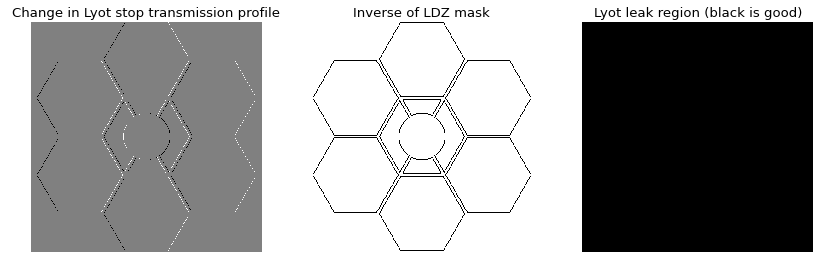

In [43]:
plt.figure(figsize=(14,5))
plt.subplot(131)
plt.imshow(LS_shift_horz - LS)
lims = plt.axis('off')
t=plt.title('Change in Lyot stop transmission profile')
plt.subplot(132)
plt.imshow(~LDZ.astype(bool))
lims = plt.axis('off')
t=plt.title('Inverse of LDZ mask')
plt.subplot(133)
plt.imshow(np.logical_and(LS_err_mask_horz, ~LDZ.astype(bool)))
lims = plt.axis('off')
t=plt.title('Lyot leak region (black is good)')

In [44]:
D = 1.
N = hexap_coron_aligntol.design['Pupil']['N']
bw = hexap_coron_aligntol.design['Image']['bw']
Nlambda = hexap_coron_aligntol.design['Image']['Nlam']
M_fp1 = hexap_coron_aligntol.design['FPM']['M']
fpm_rad = hexap_coron_aligntol.design['FPM']['rad']
rho2 = hexap_coron_aligntol.design['Image']['oda'] + 2.
fp2res = 8.
M_fp2 = int(np.ceil(rho2*fp2res))

# pupil plane
dx = (D/2)/N
dy = dx
xs = np.matrix(np.linspace(-N+0.5,N-0.5,2*N)*dx)
ys = xs

# FPM
dmx = fpm_rad/M_fp1
dmy = dmx
mxs = np.matrix(np.linspace(-M_fp1+0.5,M_fp1-0.5,2*M_fp1)*dmx)
mys = mxs

# FP2
dxi = 1/fp2res
xis = np.matrix(np.linspace(-M_fp2+0.5,M_fp2-0.5,2*M_fp2)*dxi)
etas = xis

# wavelength ratios
wrs = np.linspace(1.-bw/2, 1.+bw/2, Nlambda)
print("PSF model wavelength ratios: {0:}".format(wrs))

PSF model wavelength ratios: [ 1.]


## Fourier propagation

In [45]:
def get_onax_aplc_psf(TelAp, A, FPM, LS, xs, dx, mxs, dmx, xis, dxi, wrs):
    intens_D_polychrom = []
    for wr in wrs:
        Psi_B = dx*dx/wr*np.dot(np.dot(np.exp(-1j*2*np.pi/wr*np.dot(mxs.T, xs)), TelAp*A ),
                                       np.exp(-1j*2*np.pi/wr*np.dot(xs.T, mxs)))
        Psi_B_stop = np.multiply(Psi_B, FPM)
        Psi_C = A*TelAp - dmx*dmx/wr*np.dot(np.dot(np.exp(-1j*2*np.pi/wr*np.dot(xs.T, mxs)), Psi_B_stop),
                                                   np.exp(-1j*2*np.pi/wr*np.dot(mxs.T, xs)))
        Psi_C_stop = np.multiply(Psi_C, LS)
        Psi_D = dx*dx/wr*np.dot(np.dot(np.exp(-1j*2*np.pi/wr*np.dot(xis.T, xs)), Psi_C_stop),
                                       np.exp(-1j*2*np.pi/wr*np.dot(xs.T, xis)))
        Psi_D_0_peak = np.sum(A*TelAp*LS)*dx*dx/wr
        intens_D_polychrom.append(np.power(np.absolute(Psi_D)/Psi_D_0_peak, 2))
    return intens_D_polychrom

In [61]:
intens_n_polychrom = get_onax_aplc_psf(TelAp, An, FPM, LS, xs, dx, mxs, dmx, xis, dxi, wrs)
intens_ne_horz_polychrom = get_onax_aplc_psf(TelAp, An, FPM, LS_shift_horz, xs, dx, mxs, dmx, xis, dxi, wrs)
intens_ne_vert_polychrom = get_onax_aplc_psf(TelAp, An, FPM, LS_shift_vert, xs, dx, mxs, dmx, xis, dxi, wrs)
intens_t_polychrom = get_onax_aplc_psf(TelAp, At, FPM, LS, xs, dx, mxs, dmx, xis, dxi, wrs)
intens_te_horz_polychrom = get_onax_aplc_psf(TelAp, At, FPM, LS_shift_horz, xs, dx, mxs, dmx, xis, dxi, wrs)
intens_te_vert_polychrom = get_onax_aplc_psf(TelAp, At, FPM, LS_shift_vert, xs, dx, mxs, dmx, xis, dxi, wrs)

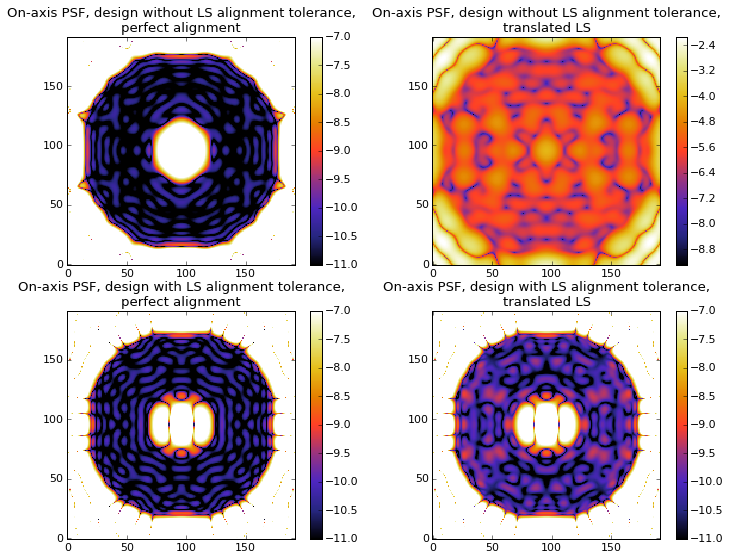

In [62]:
plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(np.log10(intens_n_polychrom[0]), vmin=-11, vmax=-7, cmap='CMRmap')
plt.colorbar()
plt.title('On-axis PSF, design without LS alignment tolerance,\nperfect alignment')

plt.subplot(222)
plt.imshow(np.log10(intens_ne_horz_polychrom[0]), cmap='CMRmap')
plt.colorbar()
plt.title('On-axis PSF, design without LS alignment tolerance,\ntranslated LS')

plt.subplot(223)
plt.imshow(np.log10(intens_t_polychrom[0]), vmin=-11, vmax=-7, cmap='CMRmap')
plt.colorbar()
plt.title('On-axis PSF, design with LS alignment tolerance,\nperfect alignment')

plt.subplot(224)
plt.imshow(np.log10(intens_te_horz_polychrom[0]), vmin=-11, vmax=-7, cmap='CMRmap')
plt.colorbar()
plt.title('On-axis PSF, design with LS alignment tolerance,\ntranslated LS')

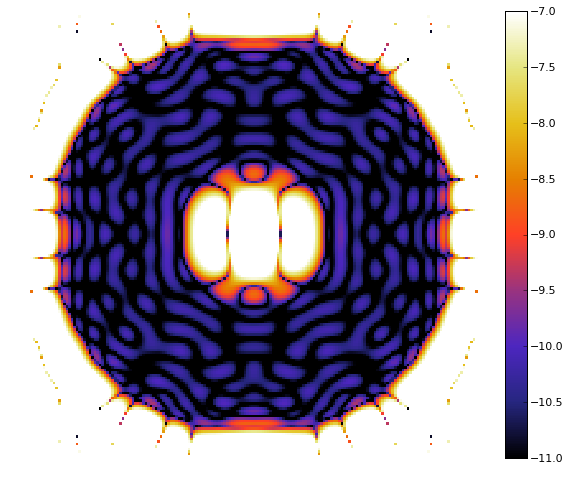

In [63]:
Nlam = 1
intens_polychrom_n, seps, radial_intens_polychrom_n = hexap_qpaplc_mono_bwtelap.get_onax_psf(Nlam=Nlam)
intens_polychrom_t, _, radial_intens_polychrom_t = hexap_qpaplc_aligntol_mono_bwtelap.get_onax_psf(Nlam=Nlam)
plt.figure(figsize=(10,8))
plt.imshow(np.log10(intens_polychrom_t[0]), cmap='CMRmap',vmin=-11,vmax=-7)
plt.colorbar()
p=plt.axis('off')

In [54]:
def get_radial_intens(intens_polychrom, xis, seps, wrs):
    radial_intens_polychrom = np.zeros((len(wrs), len(seps)))
    XXs = np.asarray(np.dot(np.matrix(np.ones(xis.shape)).T, xis))
    YYs = np.asarray(np.dot(etas.T, np.matrix(np.ones(etas.shape))))
    RRs = np.sqrt(XXs**2 + YYs**2)

    for si, sep in enumerate(seps):
        r_in = np.max([seps[0], sep-0.5])
        r_out = np.min([seps[-1], sep+0.5])
        meas_ann_mask = np.logical_and(np.greater_equal(RRs, r_in),
                                       np.less_equal(RRs, r_out))
        meas_ann_ind = np.nonzero(np.logical_and(np.greater_equal(RRs, r_in).ravel(),
                                                 np.less_equal(RRs, r_out).ravel()))[0]
        for wi, wr in enumerate(wrs):
            radial_intens_polychrom[wi, si] = np.mean(np.ravel(intens_polychrom[wi])[meas_ann_ind])
    return radial_intens_polychrom

In [67]:
rho0 = hexap_coron_aligntol.design['FPM']['rad'] + hexap_coron_aligntol.design['Image']['ida']
rho1 = hexap_coron_aligntol.design['Image']['oda'] + 1
seps = np.arange(rho0, rho1, 0.25)

radial_intens_n_polychrom = get_radial_intens(intens_n_polychrom, xis, seps, wrs)
radial_intens_t_polychrom = get_radial_intens(intens_t_polychrom, xis, seps, wrs)
radial_intens_te_horz_polychrom = get_radial_intens(intens_te_horz_polychrom, xis, seps, wrs)
radial_intens_te_vert_polychrom = get_radial_intens(intens_te_vert_polychrom, xis, seps, wrs)

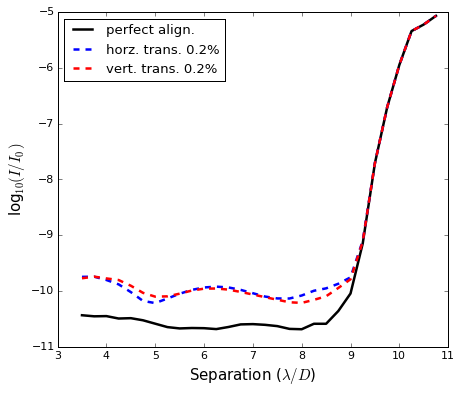

In [71]:
plt.figure(figsize=(7,6))
plt.plot(seps,np.log10(radial_intens_t_polychrom[0]),'k')
plt.plot(seps,np.log10(radial_intens_te_horz_polychrom[0]),'b--')
plt.plot(seps,np.log10(radial_intens_te_vert_polychrom[0]),'r--')
#plt.plot(seps,np.log10(radial_intens_polychrom_hp[Nlam/2]),'')
#plt.plot(seps,np.log10(radial_intens_polychrom_hp[Nlam-1]),'r')
plt.legend(['perfect align.','horz. trans. 0.2%','vert. trans. 0.2%'], loc='upper left')
plt.ylabel(r'log$_{10}(I/I_0)$',fontsize=15)
plt.xlabel(r'Separation ($\lambda/D$)',fontsize=15)